In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
cpi = pd.DataFrame()

#### CPI in the Seven Countries from Table 1.3 (pg 29)

In [7]:
cpi['date'] = [int(year) for year in """1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005""".split()]

In [12]:
us = """82.4 
90.9 
96.5 
99.6 
103.9
107.6
109.6
113.6
118.3
124.0
130.7
136.2
140.3
144.5
148.2
152.4
156.9
160.5
163.0
166.6
172.2
177.1
179.9
184.0
188.9
195.3"""

In [13]:
canada = """76.1 
85.6 
94.9 
100.4
104.7
109.0
113.5
118.4
123.2
129.3
135.5
143.1
145.3
147.9
148.2
151.4
153.8
156.3
157.8
160.5
164.9
169.1
172.9
177.7
181.0
184.9"""

In [14]:
japan = """ 91.0
 95.3
 98.1
 99.8
102.1
104.2
104.9
104.9
105.6
108.0
111.4
115.0
117.0
118.5
119.3
119.2
119.3
121.5
122.2
121.8
121.0
120.1
119.0
118.7
118.7
118.3"""

In [15]:
france = """ 72.2
 81.8
 91.7
100.3
108.0
114.3
117.2
121.1
124.3
128.7
132.9
137.2
140.4
143.4
145.8
148.4
151.4
153.2
154.2
155.0
157.6
160.2
163.3
166.7
170.3
173.2"""

In [16]:
germany = """ 86.7
 92.2
 97.0
100.3
102.7
104.8
104.6
104.9
106.3
109.2
112.2
116.3
122.2
127.6
131.1
133.3
135.3
137.8
139.1
140.0
142.0
144.8
146.7
148.3
150.8
153.7"""

In [17]:
italy = """ 63.9
 75.5
 87.8
100.8
111.4
121.7
128.9
135.1
141.9
150.7
160.4
170.5
179.5
187.7
195.3
205.6
213.8
218.2
222.5
226.2
231.9
238.3
244.3
250.8
256.3
261.3"""

In [18]:
uk = """ 78.5
 87.9
 95.4
 99.8
104.8
111.1
114.9
119.7
125.6
135.4
148.2
156.9
162.7
165.3
169.3
175.2
179.4
185.1
191.4
194.3
200.1
203.6
207.0
213.0
219.4
225.6"""

In [19]:
def string_to_float(list_of_columns, list_of_names):
    for country, name in zip(list_of_columns,list_of_names):
        cpi[name] = [float(number) for number in country.split()]

In [20]:
string_to_float([us, canada, japan, france, germany, italy, uk], ['us', 'canada', 'japan', 'france', 'germany', 'italy', 'uk'])

#### Table 1.3 Recreated

In [21]:
cpi.head()

,date,us,canada,japan,france,germany,italy,uk
0,1980,82.4,76.1,91.0,72.2,86.7,63.9,78.5
1,1981,90.9,85.6,95.3,81.8,92.2,75.5,87.9
2,1982,96.5,94.9,98.1,91.7,97.0,87.8,95.4
3,1983,99.6,100.4,99.8,100.3,100.3,100.8,99.8
4,1984,103.9,104.7,102.1,108.0,102.7,111.4,104.8


#### Problem 1.1

In [22]:
def calc_inflation(previous, current):
    return round(((current - previous) / previous) * 100,2)

In [34]:
def get_inflation_values(country):
    inflation_list = []
    for i in range(1, len(cpi.iloc[:,country])):
        inflation_list.append(calc_inflation(cpi.iloc[i-1,country], cpi.iloc[i,country]))
    return inflation_list

In [45]:
country_list = ['us', 'canada', 'japan', 'france', 'germany', 'italy', 'uk']

In [50]:
def get_inflation_df(country_list):
    inflation_df = pd.DataFrame()
    inflation_df['date'] = [int(year) for year in np.linspace(1981, 2005, 25)]
    for i in range(1, cpi.shape[1]):
        inflation_list = get_inflation_values(i)
        inflation_df[country_list[i-1]] = inflation_list
    return inflation_df

In [82]:
inflation_df = get_inflation_df(country_list)

In [131]:
inflation_df

,date,us,canada,japan,france,germany,italy,uk
0,1981,10.32,12.48,4.73,13.30,6.34,18.15,11.97
1,1982,6.16,10.86,2.94,12.10,5.21,16.29,8.53
2,1983,3.21,5.80,1.73,9.38,3.40,14.81,4.61
3,1984,4.32,4.28,2.30,7.68,2.39,10.52,5.01
4,1985,3.56,4.11,2.06,5.83,2.04,9.25,6.01
5,1986,1.86,4.13,0.67,2.54,-0.19,5.92,3.42
6,1987,3.65,4.32,0.00,3.33,0.29,4.81,4.18
7,1988,4.14,4.05,0.67,2.64,1.33,5.03,4.93
8,1989,4.82,4.95,2.27,3.54,2.73,6.20,7.80
9,1990,5.40,4.80,3.15,3.26,2.75,6.44,9.45


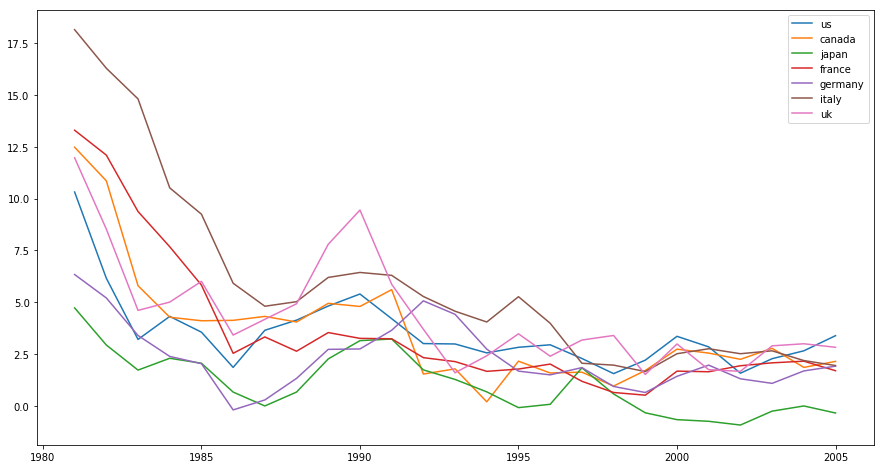

In [86]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(1,inflation_df.shape[1]):
    ax.plot(inflation_df.iloc[:,0], inflation_df.iloc[:,i])
ax.legend()

In [75]:
inflation_df.iloc[:,1:].describe()

,us,canada,japan,france,germany,italy,uk
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.00000
mean,3.526800,3.652000,1.065200,3.614000,2.328000,5.88680,4.34480
std,1.810501,2.846375,1.479902,3.411032,1.599911,4.57718,2.65224
min,1.560000,0.200000,-0.920000,0.520000,-0.190000,1.66000,1.52000
25%,2.560000,1.790000,-0.080000,1.700000,1.330000,2.52000,2.83000
50%,3.010000,2.740000,0.670000,2.160000,1.920000,4.81000,3.42000
75%,4.140000,4.320000,2.060000,3.330000,2.750000,6.30000,5.01000
max,10.320000,12.480000,4.730000,13.300000,6.340000,18.15000,11.97000


Italy seems to be the most variable with a standard deviation of 4.58.

#### Problem 1.2

In [96]:
inflation_df.iloc[:,0]

0     1981
1     1982
2     1983
3     1984
4     1985
5     1986
6     1987
7     1988
8     1989
9     1990
10    1991
11    1992
12    1993
13    1994
14    1995
15    1996
16    1997
17    1998
18    1999
19    2000
20    2001
21    2002
22    2003
23    2004
24    2005
Name: date, dtype: int64

In [119]:
# for i in range(2, 8):
#     print(inflation_df.iloc[:,i])

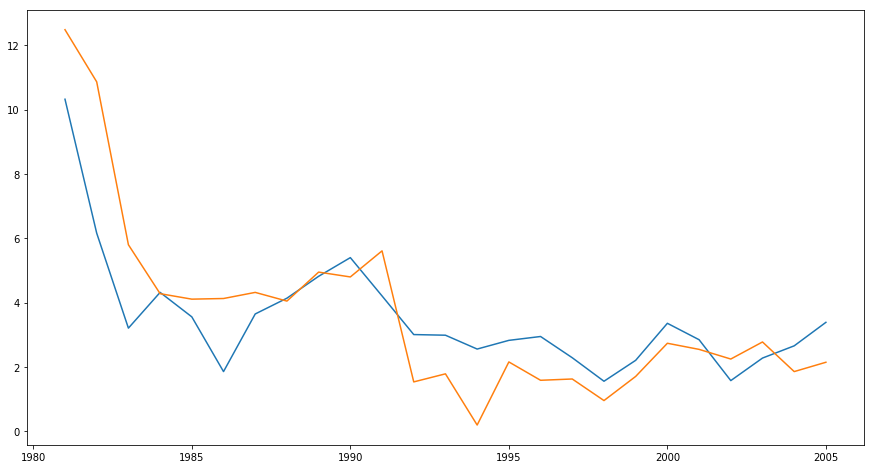

In [130]:
fig, ax = plt.subplots(figsize=(15,8))
numbers = [1,2,3,4,5,6]
ax.plot(inflation_df.iloc[:,0], inflation_df.iloc[:,1])
ax.plot(inflation_df.iloc[:,0], inflation_df.iloc[:,2])
